<a href="https://colab.research.google.com/github/yxt1998/WHY-LEO-DIED-/blob/main/WHY_LEO_DIED%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [209]:
#Based on the given data we have to predict whether the passanger survived or not. 
#You can see on the training data that there is an extra column of survived. 1 mean survived and 0 means dead.
# Importing the passanger data from GITHUB
import pandas as pd
url1 = 'https://raw.githubusercontent.com/yxt1998/WHY-LEO-DIED-/main/test.csv'
test = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/yxt1998/WHY-LEO-DIED-/main/train.csv'
train = pd.read_csv(url2)

In [210]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [211]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
# DATA PREPROSCESSING 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

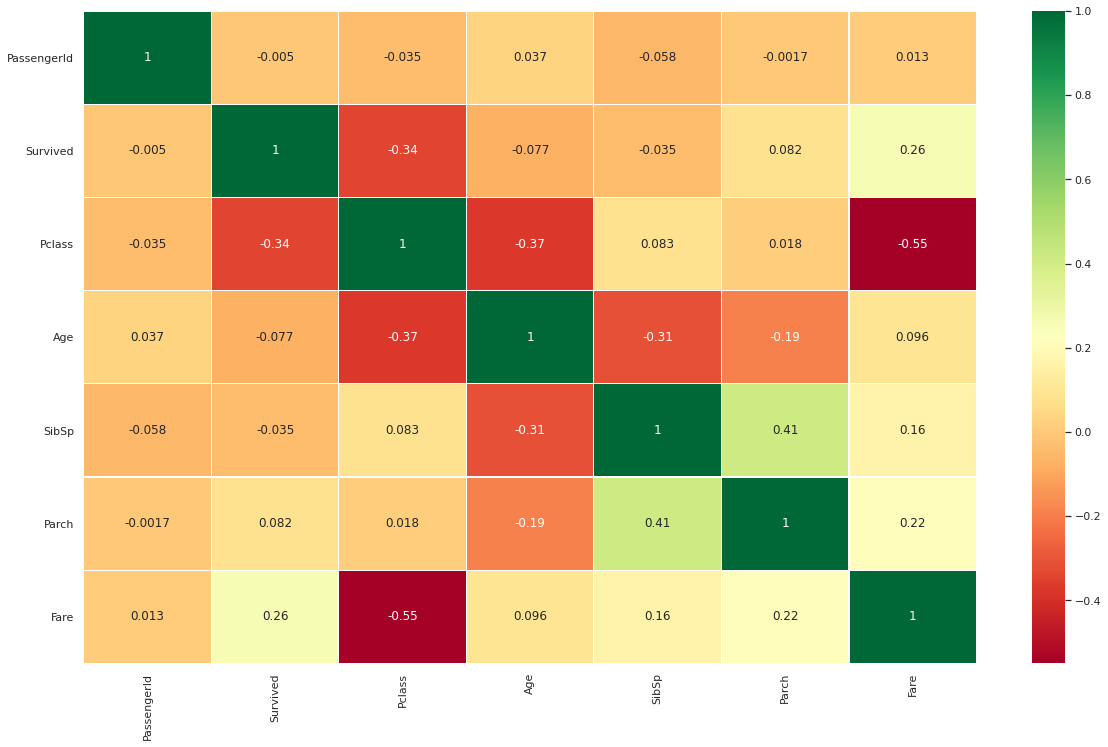

In [213]:
#looking at the datas to see which attributes corelate with the labels 
sns.heatmap(train.corr(),   
            annot=True,
            cmap='RdYlGn',
            linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

The above corealtion matrix shows strong corelartion between sex and survival. Beside that, Fare, Age and Sibbling. However, the corelation matrix is for only numerical data. There may be the corealtion between caragorical data like Pclass, Embarked, etc.

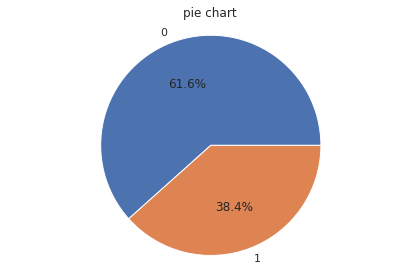

In [214]:
#looking at the percentage survived 


lab=train["Survived"].value_counts().keys().tolist()
val=train["Survived"].value_counts().values.tolist()
title = "pie chart"
plt.pie(val, labels=lab, autopct='%1.1f%%')
plt.axis('equal')
plt.title(title)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



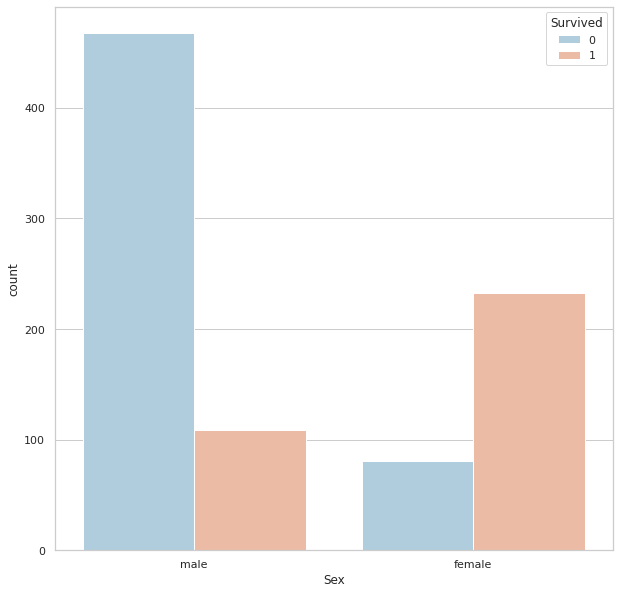

In [215]:
plt.subplots(figsize=(10,10))
sns.countplot('Sex',hue='Survived',data=train, palette='RdBu_r')
plt.show()

From the above graph graph we can say that, most of the female survived and male perished.This is a good explanation to why Leo died 

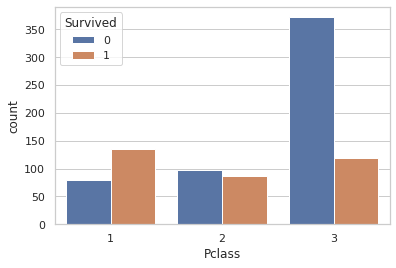

In [216]:
sns.countplot(x="Pclass",hue="Survived",data=train)

The above figure shows the number of people of different passanger class. Leo was male and from 3rd class so it was probable for him to perish 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



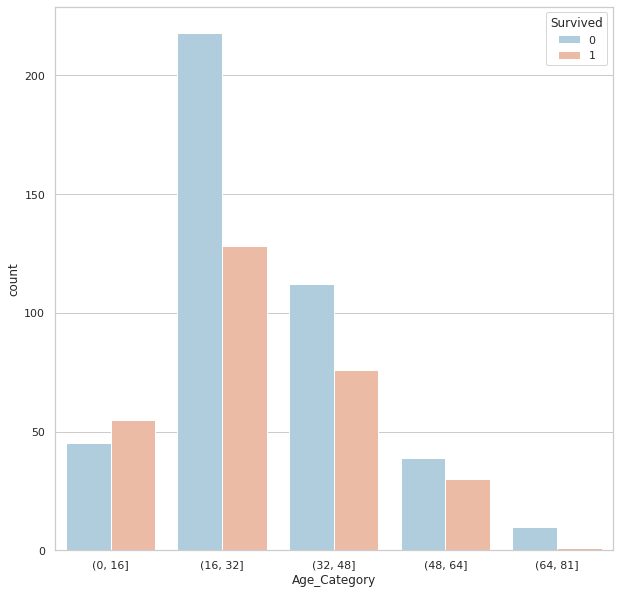

In [217]:
train['Age_Category'] = pd.cut(train['Age'],
                        bins=[0,16,32,48,64,81])
plt.subplots(figsize=(10,10))
sns.countplot('Age_Category',hue='Survived',data=train, palette='RdBu_r')
plt.show()

In [218]:
#changing the age into age catagory for better prediction
train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,"(16, 32]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C,"(32, 48]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16, 32]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,"(32, 48]"
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,"(32, 48]"


In [219]:
#looking at the number of family
train['Family'] = train['SibSp'] + train['Parch'] + 1
train['Alone'] = 0
train.loc[train['Family'] == 1, 'Alone'] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Family,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,"(16, 32]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C,"(32, 48]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16, 32]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,"(32, 48]",2,0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,"(32, 48]",1,1


In [220]:
#replacing sex catagory into number 
train['Sex'].replace("male", 0, inplace=True)
train['Sex'].replace("female", 1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Family,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,"(16, 32]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C,"(32, 48]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16, 32]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,"(32, 48]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,"(32, 48]",1,1


In [221]:
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['FareBand'] = pd.qcut(train['Fare'], 10)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

            FareBand  Survived
0     (-0.001, 7.55]  0.141304
1      (7.55, 7.854]  0.298851
2      (7.854, 8.05]  0.179245
3       (8.05, 10.5]  0.230769
4     (10.5, 14.454]  0.428571
5   (14.454, 21.679]  0.420455
6     (21.679, 27.0]  0.516854
7     (27.0, 39.688]  0.373626
8   (39.688, 77.958]  0.528090
9  (77.958, 512.329]  0.758621


In [222]:
train.loc[ train['Fare'] <= 7.55, 'Fare'] = 0
train.loc[(train['Fare'] > 7.55) & (train['Fare'] <= 7.854), 'Fare'] = 1
train.loc[(train['Fare'] > 7.854) & (train['Fare'] <= 8.05), 'Fare']   = 2
train.loc[(train['Fare'] > 8.05) & (train['Fare'] <= 10.5), 'Fare']   = 3
train.loc[(train['Fare'] > 10.5) & (train['Fare'] <= 14.454), 'Fare']   = 4
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 21.679), 'Fare']   = 5
train.loc[(train['Fare'] > 21.679) & (train['Fare'] <= 27), 'Fare']   = 6
train.loc[(train['Fare'] > 27) & (train['Fare'] <= 39.688), 'Fare']   = 7
train.loc[(train['Fare'] > 39.688) & (train['Fare'] <= 77.958), 'Fare']   = 8
train.loc[ train['Fare'] > 77.958, 'Fare'] = 9
train['Fare'] = train['Fare'].astype(int)

train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Family,Alone,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0,NaN,S,"(16.0, 32.0]",2,0,"(-0.001, 7.55]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,8,C85,C,"(32.0, 48.0]",2,0,"(39.688, 77.958]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,2,NaN,S,"(16.0, 32.0]",1,1,"(7.854, 8.05]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,8,C123,S,"(32.0, 48.0]",2,0,"(39.688, 77.958]"
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,2,NaN,S,"(32.0, 48.0]",1,1,"(7.854, 8.05]"
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,3,NaN,Q,NaN,1,1,"(8.05, 10.5]"
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,8,E46,S,"(48.0, 64.0]",1,1,"(39.688, 77.958]"
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,5,NaN,S,"(0.0, 16.0]",5,0,"(14.454, 21.679]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,347742,4,NaN,S,"(16.0, 32.0]",3,0,"(10.5, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,7,NaN,C,"(0.0, 16.0]",2,0,"(27.0, 39.688]"


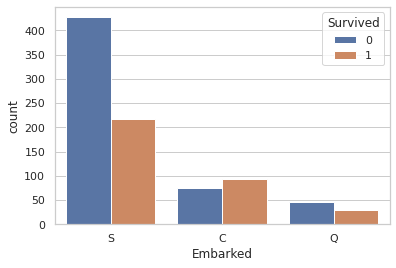

In [223]:
sns.countplot(x="Embarked",hue="Survived",data=train)

The above figure shows that most of the people embarked from S. So we replace the NaN vlaue with and encoded this catagorical value. We can use one hot encoder fom sklearn or we can encode ourselves too. Since there are only three valuees, I encoded myselves. 

In [224]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [225]:
print(train.Embarked.isnull().sum())

2


In [226]:
train['Embarked'] = train['Embarked'].fillna('S')
print(train.Embarked.isnull().sum())

0


In [227]:

train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Family,Alone,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0,NaN,0,"(16, 32]",2,0,"(-0.001, 7.55]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,8,C85,1,"(32, 48]",2,0,"(39.688, 77.958]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,2,NaN,0,"(16, 32]",1,1,"(7.854, 8.05]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,8,C123,0,"(32, 48]",2,0,"(39.688, 77.958]"
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,2,NaN,0,"(32, 48]",1,1,"(7.854, 8.05]"


In [228]:
#Removing the colums that does not corelate with survival. 
train = train.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Age_Category', 'FareBand'], axis=1)

In [229]:
train['Age'] = train['Age'].fillna(2)
train['Age'] = train['Age'].astype(int)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Alone
0,1,0,3,0,1,0,0,2,0
1,2,1,1,1,2,8,1,2,0
2,3,1,3,1,1,2,0,1,1
3,4,1,1,1,2,8,0,2,0
4,5,0,3,0,2,2,0,1,1


In [230]:
test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age'] = 4
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,2.0,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,3.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,1.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,1,3101298,12.2875,NaN,S


In [231]:
test['Family'] = test['SibSp'] + test['Parch'] + 1
test['Alone'] = 0
test.loc[test['Family'] == 1, 'Alone'] = 1
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
0,892,3,"Kelly, Mr. James",male,2.0,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.0,1,0,363272,7.0000,NaN,S,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,3.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,1.0,0,0,315154,8.6625,NaN,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,1,3101298,12.2875,NaN,S,3,0


In [232]:
test['Sex'].replace("male", 0, inplace=True)
test['Sex'].replace("female", 1, inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,1,0,363272,7.0000,NaN,S,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,315154,8.6625,NaN,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,NaN,S,3,0


In [233]:
print(test.Fare.isnull().sum())

1


In [234]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test.loc[ test['Fare'] <= 7.55, 'Fare'] = 0
test.loc[(test['Fare'] > 7.55) & (test['Fare'] <= 7.854), 'Fare'] = 1
test.loc[(test['Fare'] > 7.854) & (test['Fare'] <= 8.05), 'Fare']   = 2
test.loc[(test['Fare'] > 8.05) & (test['Fare'] <= 10.5), 'Fare']   = 3
test.loc[(test['Fare'] > 10.5) & (test['Fare'] <= 14.454), 'Fare']   = 4
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 21.679), 'Fare']   = 5
test.loc[(test['Fare'] > 21.679) & (test['Fare'] <= 27), 'Fare']   = 6
test.loc[(test['Fare'] > 27) & (test['Fare'] <= 39.688), 'Fare']   = 7
test.loc[(test['Fare'] > 39.688) & (test['Fare'] <= 77.958), 'Fare']   = 8
test.loc[ test['Fare'] > 77.958, 'Fare'] = 9
test['Fare'] = test['Fare'].astype(int)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,1,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,1,0,363272,0,NaN,S,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,3,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,315154,3,NaN,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,4,NaN,S,3,0


In [235]:
print(test.Embarked.isnull().sum())

0


In [236]:
test['Embarked'] = test['Embarked'].fillna('S')
print(test.Embarked.isnull().sum())

0


In [237]:
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,1,NaN,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,1,0,363272,0,NaN,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,3,NaN,2,1,1
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,315154,3,NaN,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,4,NaN,0,3,0


In [238]:
#Removing the colums that does not corelate with survival. 
test = test.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1)

test['Age'] = test['Age'].fillna(2)
test['Age'] = test['Age'].astype(int)
test.head()


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family,Alone
0,892,3,0,2,1,2,1,1
1,893,3,1,2,0,0,2,0
2,894,2,0,3,3,2,1,1
3,895,3,0,1,3,0,1,1
4,896,3,1,1,4,0,3,0


In [239]:
all_features = train.drop("Survived",axis=1)
Targeted_feature = train["Survived"]

In [240]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap=True,
                                       class_weight=None,
                                       criterion='gini',
                                       max_depth=None,
                                       max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, 
                                       min_impurity_split=None,
                                       min_samples_leaf=1,
                                       min_samples_split=2,
                                       min_weight_fraction_leaf=0.0, 
                                       n_estimators=400,
                                       n_jobs=1,
                                       oob_score=False,
                                       random_state=None,
                                       verbose=0,
                                       warm_start=False)

clf.fit(all_features, Targeted_feature)
y_pred_random = clf.predict(test)
acc_random_forest = round(clf.score(all_features, Targeted_feature) * 100, 2)
print (acc_random_forest)
submission = pd.DataFrame({ "PassengerId": test["PassengerId"], "Survived": y_pred_random})

100.0


In [242]:
submission.head(20)

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [265]:
submission.to_csv('TITANIC_SUBMISIION.csv',index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
